## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [4]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt


## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

On charge les données du training set

In [3]:
# Chargement des données
train = np.loadtxt('synth_train.txt')

# On prend les labels
class_train = train[:,0]
# On prend les coordonnées
x_train = train[:,1:]
N_train = train.shape[0]


On peut faire un affichage pour avoir une visualisation de nos données d'entrainement

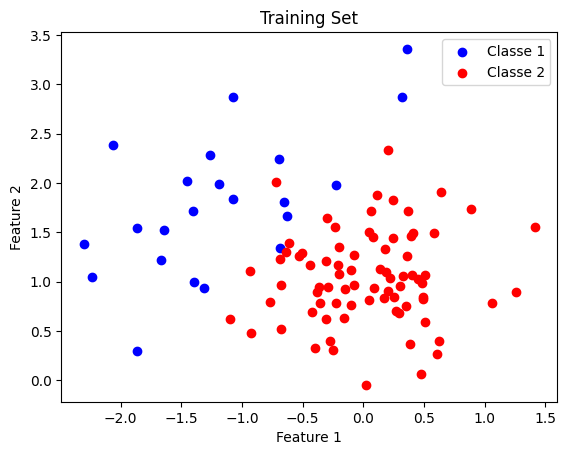

In [6]:
# Affichage de l'ensemble d'entraînement

# On sépare les échantillons par classe
class_1 = x_train[class_train == 1]
class_2 = x_train[class_train == 2]

# On affiche l'ensemble d'entraînement
plt.scatter(class_1[:,0], class_1[:,1], c='blue', label='Classe 1')
plt.scatter(class_2[:,0], class_2[:,1], c='red', label='Classe 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set')
plt.legend()

plt.savefig("img/training_set.png")
plt.show()

On observe bien que les deux classes sont distinctes, il est donc cohérent d'essayer de construire un modèle de classification

On charge les données du test set

In [9]:
test = np.loadtxt('synth_test.txt')

# On définit nos deux classes 1 et 2
class_test_1 = test[test[:,0]==1]
class_test_2 = test[test[:,0]==2]

# On prend les coordonnées
x_test = test[:,1:]
N_test = test.shape[0]

On peut aussi faire un affichage pour avoir une visualisation de nos données de test

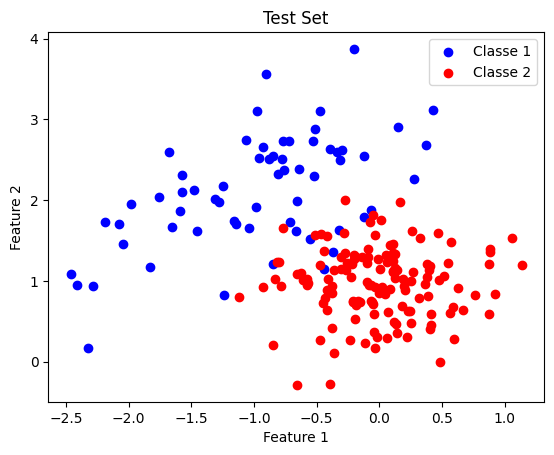

In [10]:
# On affiche le test set pour vérifier que l'import a bien fonctionné et pour avoir une visualisation de notre set de test
plt.scatter(class_test_1[:,1], class_test_1[:,2], c='blue', label='Classe 1')
plt.scatter(class_test_2[:,1], class_test_2[:,2], c='red', label='Classe 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Set')
plt.legend()
plt.savefig("img/test_set.png")
plt.show()

Nos données ressemblent bien aux données d'entrainement. Nous pouvons maintenant commencer à concevoir nos modèles de classification

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [10]:
#Question 1

#Découpage des data en deux tableaux, en fonction de la classe

train_features = train[:, 1:]
test_features = test[:, 1:]

train_labels = train[:, 0]
test_labels = test[:, 0]

N = len(train)
N1 = np.sum(train[:, 0] == 1)
N2 = N - N1

pi_1 = N1 / N
pi_2 = 1 - pi_1

mu_1 = np.mean(train[train[:,0] == 1][:, 1:], axis=0)
mu_2 = np.mean(train[train[:,0] == 2][:, 1:], axis=0)

sigma_1 = np.cov(train[train[:, 0] == 1][:, 1:], rowvar=False)
sigma_2 = np.cov(train[train[:, 0] == 2][:, 1:], rowvar=False)

sigma = 1/N *(N1 * sigma_1 + N2 * sigma_2)

print("sigma1",sigma_1, "sigma2",sigma_2,"sigma", sigma)
print("mu1", mu_1)

def lda_classifier(x):
    d1 = np.dot(np.dot(x - mu_1, np.linalg.inv(sigma)), (x - mu_1)) + 2 * np.log(pi_1)
    d2 = np.dot(np.dot(x - mu_2, np.linalg.inv(sigma)), (x - mu_2)) + 2 * np.log(pi_2)
    return 1 if d1 < d2 else 2



sigma1 [[0.54124863 0.32258376]
 [0.32258376 0.51088153]] sigma2 [[0.24599115 0.01961141]
 [0.01961141 0.21154879]] sigma [[0.3109478  0.08626533]
 [0.08626533 0.277402  ]]
mu1 [-1.18350693  1.78655437]


In [4]:
def qda_classifier(x):
    d1 = -0.5 * np.log(np.linalg.det(sigma_1)) - 0.5 * np.dot(np.dot((x - mu_1).T, np.linalg.inv(sigma_1)), (x - mu_1)) + np.log(pi_1)
    d2 = -0.5 * np.log(np.linalg.det(sigma_2)) - 0.5 * np.dot(np.dot((x - mu_2).T, np.linalg.inv(sigma_2)), (x - mu_2)) + np.log(pi_2)
    return 1 if d1 < d2 else 2

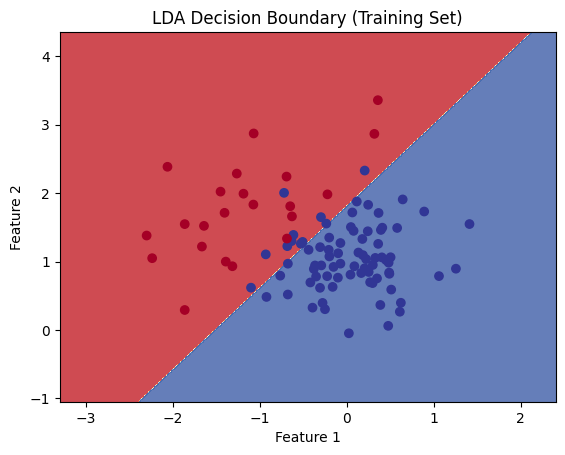

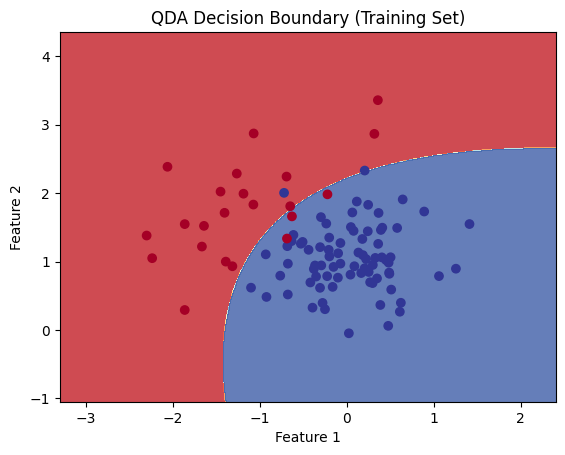

LDA Training Error Rate: 0.10999999999999999
LDA Test Error Rate: 0.09499999999999997
QDA Training Error Rate: 0.050000000000000044
QDA Test Error Rate: 0.050000000000000044


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming you have implemented LDA and QDA classifiers
# lda_classifier(x) and qda_classifier(x) are the classification functions

# Define a function to visualize the decision boundary
def plot_decision_boundary(classifier, features, labels, title):
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([classifier(point) for point in mesh_points])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.RdYlBu, marker='o')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Apply LDA to the training and test sets
lda_train_predictions = np.array([lda_classifier(x) for x in train_features])
lda_test_predictions = np.array([lda_classifier(x) for x in test_features])

# Visualize the LDA decision boundary on the training set
plot_decision_boundary(lda_classifier, train_features, train_labels, title="LDA Decision Boundary (Training Set)")

# Compute error rates for LDA
lda_train_error = 1 - accuracy_score(train_labels, lda_train_predictions)
lda_test_error = 1 - accuracy_score(test_labels, lda_test_predictions)

# Apply QDA to the training and test sets
qda_train_predictions = np.array([qda_classifier(x) for x in train_features])
qda_test_predictions = np.array([qda_classifier(x) for x in test_features])

# Visualize the QDA decision boundary on the training set
plot_decision_boundary(qda_classifier, train_features, train_labels, title="QDA Decision Boundary (Training Set)")

# Compute error rates for QDA
qda_train_error = 1 - accuracy_score(train_labels, qda_train_predictions)
qda_test_error = 1 - accuracy_score(test_labels, qda_test_predictions)

# Display error rates
print("LDA Training Error Rate:", lda_train_error)
print("LDA Test Error Rate:", lda_test_error)
print("QDA Training Error Rate:", qda_train_error)
print("QDA Test Error Rate:", qda_test_error)

In [6]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,3.5,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
#N = size(x,axis=0)

# Then compute the sampled prediction class_L for each couple (X1,X2)

TypeError: Image data of dtype object cannot be converted to float

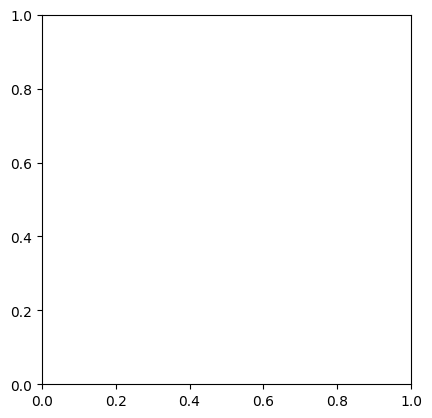

In [7]:
# For graphical representation  use code below for instance :
class_L = ...
plt.imshow(class_L, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)) )
plt.show()

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...


